In [1]:
import sys
import numpy as np 
from torch.utils.data import DataLoader 
from datasets.dataset_ensemble import EnsembleDataset 
from utils.ensemble import get_best_model_idx  
from utils.ensemble import get_weighed_ensemble_result
from utils.ensemble import porting_args

In [2]:
def customcollatefn(sample):

    img, label = list(zip(*sample))

    img = np.array(img, dtype=np.float32)
    label = np.array(label, dtype=np.float32)

    return img, label

In [3]:
IMAGE_ROOT = '/opt/ml/input/data/train/DCM'
LABEL_ROOT = '/opt/ml/input/data/train/outputs_json'

config_path = './config.json'
args = porting_args(config_path)

dataset = EnsembleDataset(args, IMAGE_ROOT, LABEL_ROOT, fold_num=0, is_train=False)

data_loader = DataLoader(
        dataset=dataset, 
        batch_size=1,
        collate_fn = customcollatefn,
        shuffle=False,
        num_workers=8, # 8
        drop_last=True,
    )

In [4]:
image, label = next(iter(data_loader))
print(image.shape, label.shape)

(1, 3, 512, 512) (1, 29, 512, 512)


In [5]:
# sys.path.insert(0, '/opt/ml/input/code/develop2/')

model_paths = [
    '/opt/ml/temp/checkpoint_HJH/Unet_512_best_model.pt' # for JH, os.path.join(args.savedir, args.exp_name+str(args.exp_num))
] 

config_path = './config.json'

best_model_idx_per_class = get_best_model_idx(model_paths, config_path, data_loader)

100%|██████████| 160/160 [00:30<00:00,  5.26it/s]

model 0:  [0.96399325, 0.9812237, 0.9851322, 0.9726383, 0.97660077, 0.98591185, 0.9822372, 0.97478855, 0.979175, 0.98708594, 0.9762646, 0.9726942, 0.9789362, 0.98412293, 0.9775585, 0.96650827, 0.96836346, 0.98255694, 0.98304856, 0.94532716, 0.91710025, 0.9579731, 0.9478685, 0.96934783, 0.95672905, 0.95205563, 0.90579116, 0.9885062, 0.98896015]


In [6]:
best_model_idx_per_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [8]:
# ensemble 할 csv 파일 경로
output_paths = [
    '/opt/ml/output/ouptut_HJH/output_202306201642.csv' #### 열람 경로 수정하기 ####
] 

save_path = '/opt/ml/temp/weighted_ensemble/weighted_ensemble_output_1.csv'  #### 저장 경로 수정하기 ####


# get_weighed_ensemble_result(output_paths, save_path, best_model_idx_per_class) 
get_weighed_ensemble_result(output_paths, save_path, best_model_idx_per_class, weight=2, thr=2)

100%|██████████| 300/300 [04:13<00:00,  1.18it/s]



Done!


Text(0.5, 1.0, 'weighted_ensemble_output_1.csv')

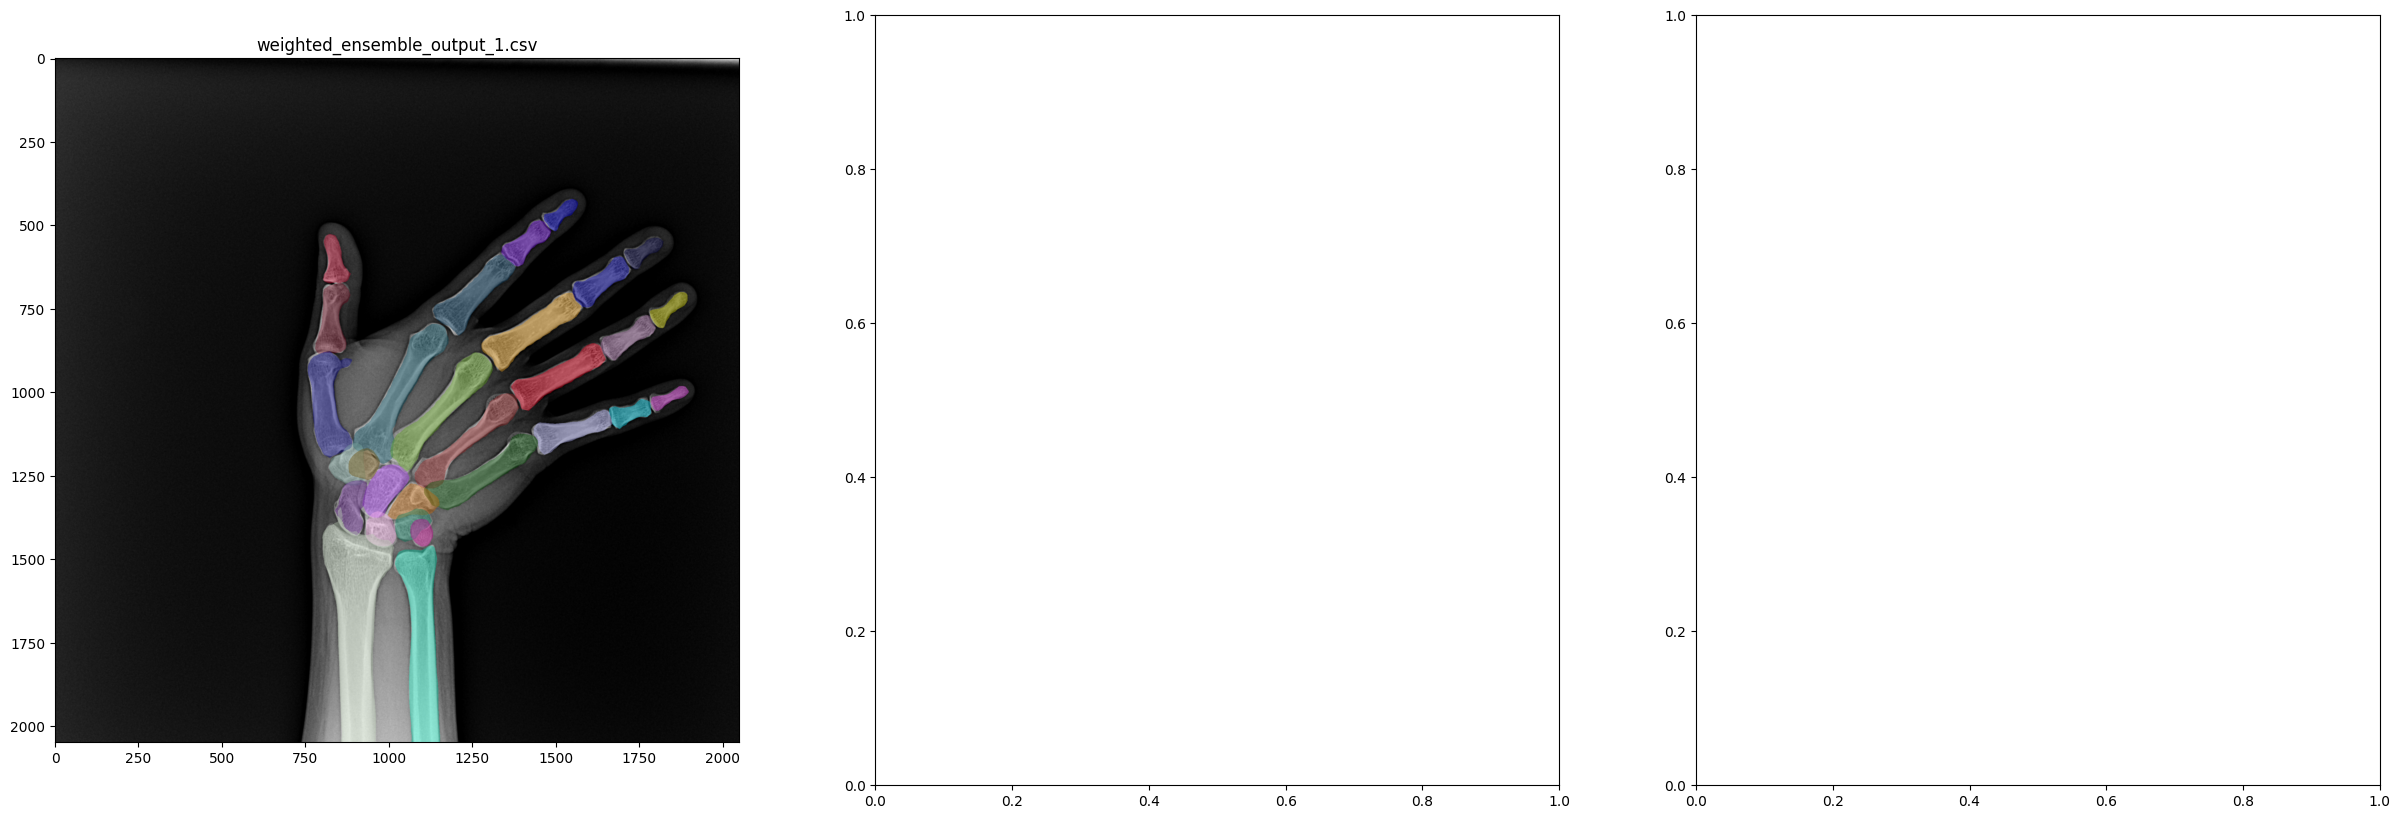

In [10]:
from utils.vis import get_masked_image_from_csv 
from matplotlib import pyplot as plt 

image_path = '/opt/ml/input/data/test/DCM/ID255/image1663723504424.png'
csv_path1 = '/opt/ml/temp/weighted_ensemble/weighted_ensemble_output_1.csv'
# csv_path2 = '/opt/ml/ensemble_outputs/weighted_ensemble_output_2.csv'
# csv_path3 = '/opt/ml/input/code/saved_model/exp27_EfficientUNetpp_1024_aug1_customloss/epoch061_ouput.csv'

masked_image1 = get_masked_image_from_csv(image_path, csv_path1)
# masked_image2 = get_masked_image_from_csv(image_path, csv_path2)
# masked_image3 = get_masked_image_from_csv(image_path, csv_path3) 

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0].imshow(masked_image1) 
ax[0].set_title('weighted_ensemble_output_1.csv')
# ax[1].imshow(masked_image2)
# ax[1].set_title('weighted_ensemble_output_1.csv') 
# ax[2].imshow(masked_image3)
# ax[2].set_title('exp27_EfficientUNetpp') 

Text(0.5, 1.0, 'weighted_ensemble_output_1.csv')

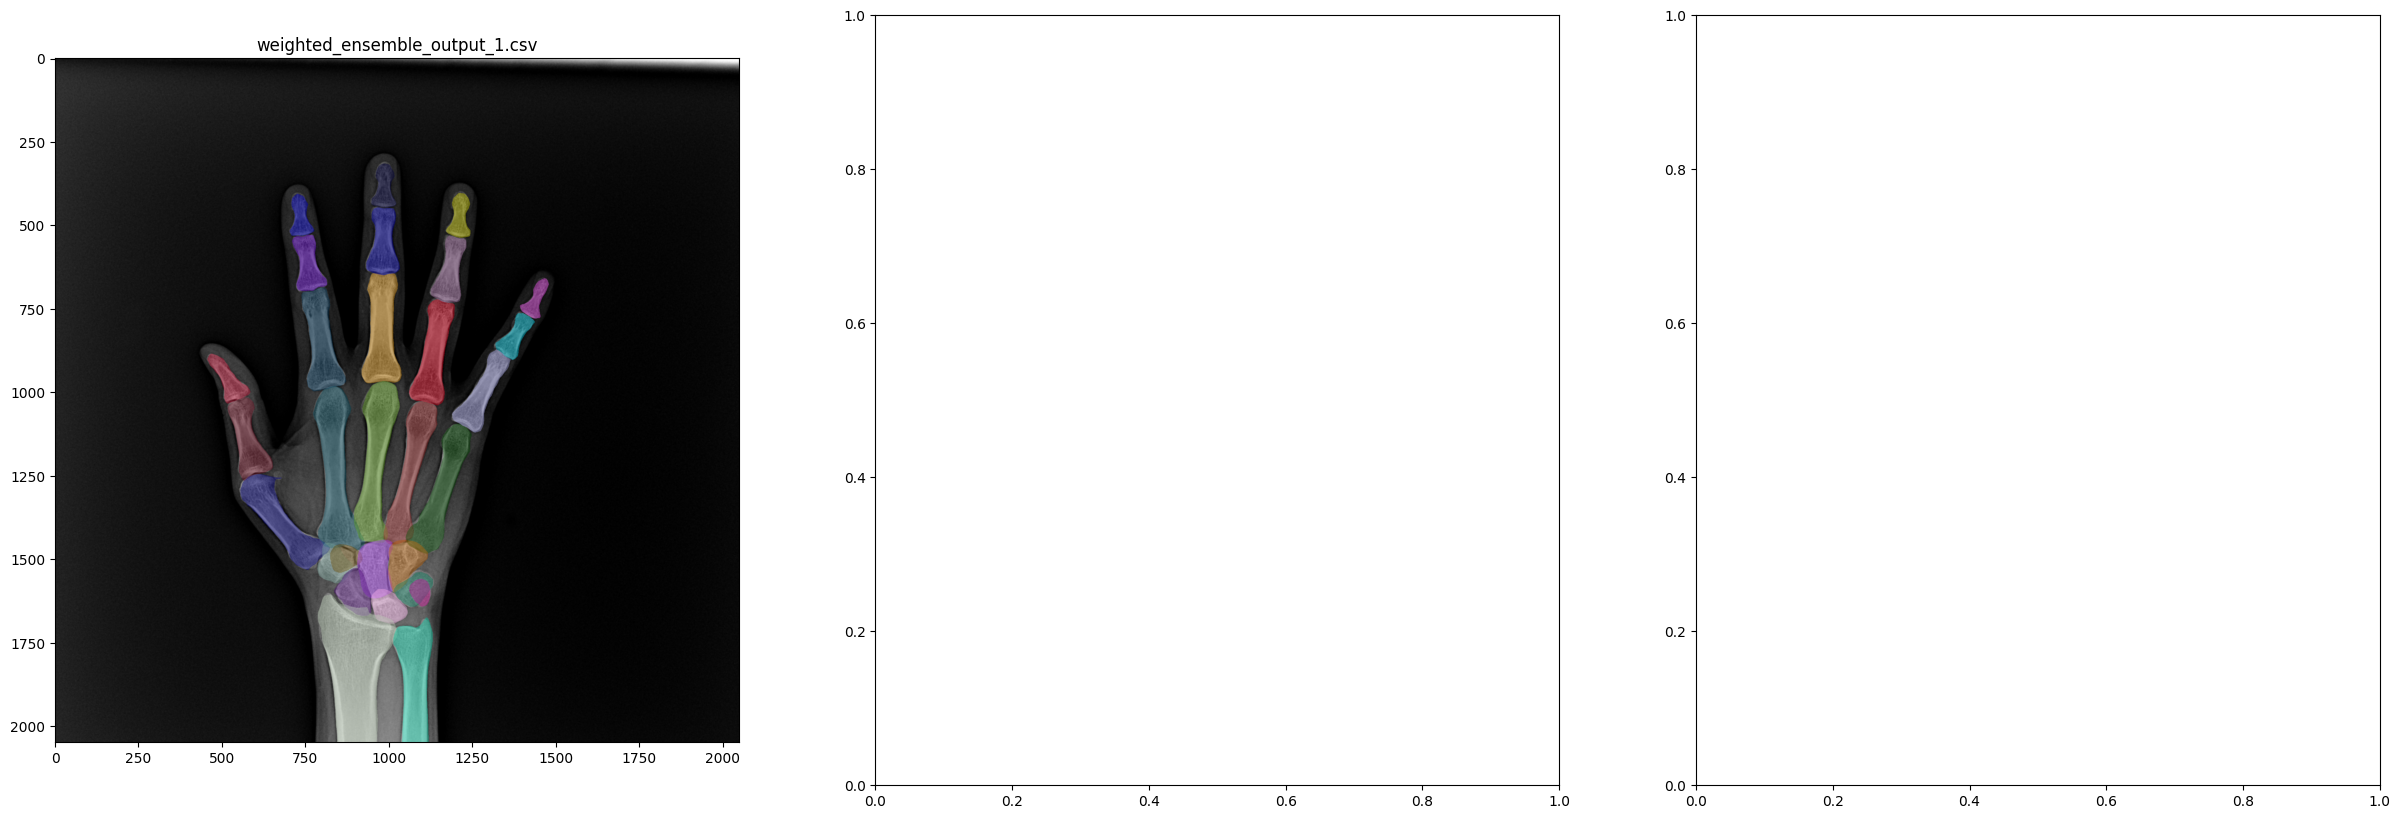

In [11]:
image_path2 = '/opt/ml/input/data/test/DCM/ID040/image1661319116107.png' 

masked_image1 = get_masked_image_from_csv(image_path2, csv_path1)
# masked_image2 = get_masked_image_from_csv(image_path2, csv_path2)
# masked_image3 = get_masked_image_from_csv(image_path2, csv_path3) 

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0].imshow(masked_image1) 
ax[0].set_title('weighted_ensemble_output_1.csv')
# ax[1].imshow(masked_image2)
# ax[1].set_title('weighted_ensemble_output_1.csv') 
# ax[2].imshow(masked_image3)
# ax[2].set_title('exp27_EfficientUNetpp') 